In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-season-3-episode-6/sample_submission.csv
/kaggle/input/playground-series-season-3-episode-6/train.csv
/kaggle/input/playground-series-season-3-episode-6/test.csv
/kaggle/input/paris-housing-price-prediction/ParisHousing.csv


In [2]:
train=pd.read_csv('/kaggle/input/playground-series-season-3-episode-6/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-season-3-episode-6/test.csv')
sample_submission=pd.read_csv('/kaggle/input/playground-series-season-3-episode-6/sample_submission.csv')
original_data=pd.read_csv('/kaggle/input/paris-housing-price-prediction/ParisHousing.csv')

In [3]:
train.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [4]:
train.shape

(22730, 18)

In [5]:
test.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9


In [6]:
test.shape

(15154, 17)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# EDA

In [8]:
# check missing values
train.isnull().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [9]:
#check the data types
train.dtypes

id                     int64
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

In [10]:
train.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8


In [11]:
train.describe()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,22730.000000,2.273000e+04,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,22730.000000,2.273000e+04
mean,11364.500000,4.658622e+04,48.241091,0.475891,0.452750,47.305983,50013.795996,5.585042,5.620766,2008.005059,0.467972,0.460009,5283.646634,5067.981698,530.469644,0.461681,5.153058,4.634457e+06
std,6561.730145,4.952124e+04,28.226428,0.499429,0.497773,47.777207,30006.637729,2.739533,2.713026,118.826777,0.498984,0.498409,3047.084412,3097.347939,274.840604,0.498540,3.055246,2.925163e+06
min,0.000000,8.900000e+01,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,4.000000,1.000000,4.000000,0.000000,0.000000,1.031350e+04
25%,5682.250000,2.039275e+04,25.000000,0.000000,0.000000,25.000000,22936.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,2977.250000,2599.000000,297.000000,0.000000,3.000000,2.041739e+06
50%,11364.500000,4.448400e+04,47.000000,0.000000,0.000000,45.000000,50414.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,4977.000000,515.000000,0.000000,5.000000,4.450823e+06
75%,17046.750000,7.154700e+04,75.000000,1.000000,1.000000,69.000000,76291.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7746.000000,7652.000000,767.000000,1.000000,8.000000,7.159920e+06
max,22729.000000,6.071330e+06,100.000000,1.000000,1.000000,6000.000000,491100.000000,10.000000,10.000000,10000.000000,1.000000,1.000000,91992.000000,96381.000000,9017.000000,1.000000,10.000000,1.000428e+07


## Outlier
It appears that the 'made' column has an outlier. The max. value is 10000, which is clearly an error. I will drop any rows that has the problematic value.

In [12]:
train=train[train.made<2022]
#Also convert made year in number of years it was made from max. year
train['made']=train['made'].max()-train['made']
train.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,21,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,21,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,1,1,1,7473,8953,245,1,9,9276448.1
3,3,97184,99,0,0,59,15113,1,1,21,0,1,6424,8522,256,1,9,9725732.2
4,4,61752,100,0,0,57,64245,8,4,3,1,0,7151,2786,863,0,7,6181908.8


In [13]:
# No outlier detected in test data
test.describe()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
count,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000,15154.000000
mean,30306.500000,45729.407681,47.874951,0.483371,0.445361,46.401148,50185.582750,5.616933,5.602547,2006.225485,0.472219,0.463442,5299.415468,5057.506599,525.091065,0.463178,5.095618
std,4374.727325,29200.142520,28.164077,0.499740,0.497022,27.000547,31227.690126,2.727914,2.718316,8.156347,0.499244,0.498678,2980.156234,2928.004147,268.504745,0.498659,3.049174
min,22730.000000,69.000000,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1990.000000,0.000000,0.000000,8.000000,1.000000,8.000000,0.000000,0.000000
25%,26518.250000,19189.000000,25.000000,0.000000,0.000000,25.000000,23141.000000,3.000000,3.000000,2000.000000,0.000000,0.000000,3114.000000,2567.000000,294.250000,0.000000,2.000000
50%,30306.500000,43802.000000,46.000000,0.000000,0.000000,44.000000,50693.000000,6.000000,6.000000,2006.000000,0.000000,0.000000,5359.000000,5017.000000,501.000000,0.000000,5.000000
75%,34094.750000,70898.000000,75.000000,1.000000,1.000000,69.000000,76264.000000,8.000000,8.000000,2014.000000,1.000000,1.000000,7739.000000,7650.750000,757.000000,1.000000,8.000000
max,37883.000000,99999.000000,100.000000,1.000000,1.000000,100.000000,977950.000000,10.000000,10.000000,2021.000000,1.000000,1.000000,89016.000000,38535.000000,1000.000000,1.000000,10.000000


# Visualizations
## Correlation with the target

<AxesSubplot:>

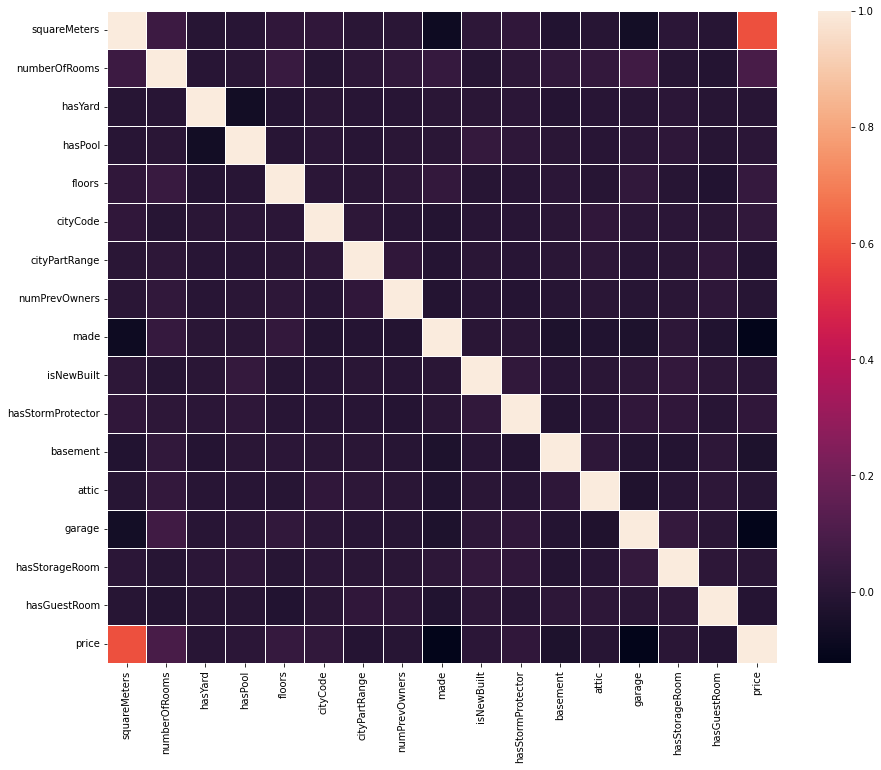

In [15]:
Corr=train.iloc[:,1:].corr()
plt.figure(figsize=(15,12))
sns.heatmap(Corr,linecolor='white',linewidth=1)

## Insight:
only squaremeters is strongly correlated with the price. No noticeable contribution seen from other features.

In [16]:
train.iloc[:,:-1].corrwith(train.iloc[:,-1])

id                  -0.008159
squareMeters         0.591701
numberOfRooms        0.091570
hasYard             -0.002423
hasPool              0.006136
floors               0.038270
cityCode             0.021892
cityPartRange       -0.009461
numPrevOwners       -0.008562
made                -0.123189
isNewBuilt           0.008136
hasStormProtector    0.020567
basement            -0.034973
attic               -0.006997
garage              -0.120029
hasStorageRoom       0.001684
hasGuestRoom        -0.009146
dtype: float64

In [17]:
train.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [18]:
categorical_features=['hasYard', 'hasPool','cityCode', 'cityPartRange', 'made', 'isNewBuilt',
       'hasStormProtector', 'hasStorageRoom',
       'hasGuestRoom']

In [ ]:
# train_cat=train[categorical_features]
# train_cat.head()

# Data Preprocessing

In [19]:
# Drop zip code
train=train.drop('cityCode',axis=1)
# get features and target
x=train.loc[:,'squareMeters':'hasGuestRoom']
y=train.loc[:,'price']
#  Normalize the data
x= (x- x.min()) / (x.max() - x.min())

# Splitting data into train,val, and test

In [20]:
x_train,x_val1,y_train,y_val1=train_test_split(x,y,train_size=0.7,random_state=1)
x_val,x_test,y_val,y_test=train_test_split(x_val1,y_val1,test_size=0.5,random_state=1)

# Linear model

### Linear model-1

In [21]:
# Define linear regression
model_LR=LinearRegression()
model_LR.fit(x_train,y_train)

pred_train=model_LR.predict(x_train)
pred_val=model_LR.predict(x_val)
rmse_train=mean_squared_error(y_train,pred_train,squared=False)
rmse_val=mean_squared_error(y_val,pred_val,squared=False)
print(rmse_train,rmse_val)

2449416.6364175137 2080922.5106598642


## Linear model-2

### consider only regressional features.
I will remove categorical ( binary, more strictly speaking) and see how we improve the result.

In [23]:
reg_features=['squareMeters', 'numberOfRooms', 'floors',
       'cityPartRange', 'numPrevOwners', 'made', 'basement', 'attic', 'garage']

In [24]:
# choose only reg featues
x=x[reg_features]
#train-test-val-split
x_train,x_val1,y_train,y_val1=train_test_split(x,y,train_size=0.7,random_state=1)
x_val,x_test,y_val,y_test=train_test_split(x_val1,y_val1,test_size=0.5,random_state=1)

# Define linear regression
model_LR=LinearRegression()
model_LR.fit(x_train,y_train)

pred_train=model_LR.predict(x_train)
pred_val=model_LR.predict(x_val)
rmse_train=mean_squared_error(y_train,pred_train,squared=False)
rmse_val=mean_squared_error(y_val,pred_val,squared=False)
print(rmse_train,rmse_val)

2449868.871970954 2080533.9050661398


In [26]:
# Prediction
pred_test=model_LR.predict(x_test)
rmse_test=mean_squared_error(y_test,pred_test,squared=False)
rmse_test

2181361.246644872

# prepare for submission

In [27]:
test.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2
3,22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5
4,22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9


In [28]:
test['id']

0        22730
1        22731
2        22732
3        22733
4        22734
         ...  
15149    37879
15150    37880
15151    37881
15152    37882
15153    37883
Name: id, Length: 15154, dtype: int64

In [29]:
#select features data
X_test=test.loc[:,'squareMeters':'hasGuestRoom']
# select_normalized features
X_test=X_test[reg_features]

# normalize
X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())

# Predict
Y_predict=model_LR.predict(X_test)
# Create submission dataframe
submission=pd.DataFrame({'id':test['id'],'price':Y_predict})
submission.to_csv('submission.csv',index=False)

# Decision Tree Regressor

In [31]:
# get features and target
x=train.loc[:,'squareMeters':'hasGuestRoom']
y=train.loc[:,'price']
#  Normalize the data
x= (x- x.min()) / (x.max() - x.min())

In [32]:
x_train,x_val1,y_train,y_val1=train_test_split(x,y,train_size=0.7,random_state=1)
x_val,x_test,y_val,y_test=train_test_split(x_val1,y_val1,test_size=0.5,random_state=1)

param=[{'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
        'splitter':['best','random'],
         'max_depth':[3,5,10,25,50,100,None],
         'ccp_alpha':[0,0.001,0.01]
        }]

# Define linear regression
model_DR=DecisionTreeRegressor()

# # Use GridSearchCV to find the best hyperparameters for the classifier
grid_search = GridSearchCV(model_DR,param,cv=5)
grid_search.fit(x_train,y_train)

print("Best hyperparameters: ", grid_search.best_params_)
# pred_train=model_LR.predict(x_train)
# pred_val=model_LR.predict(x_val)
# rmse_train=mean_squared_error(y_train,pred_train,squared=False)
# rmse_val=mean_squared_error(y_val,pred_val,squared=False)
# print(rmse_train,rmse_val)

Best hyperparameters:  {'ccp_alpha': 0, 'criterion': 'friedman_mse', 'max_depth': 100, 'splitter': 'best'}


In [33]:
#model=GradientBoostingClassifier(learning_rate=0.01, n_estimators=i)
n_trees = 100
#best_accuracy=0
train_accuracy=[]
val_accuracy=[]
for i in range(1,n_trees):
    model_DR=DecisionTreeRegressor(max_depth=i,criterion='squared_error',splitter='best',ccp_alpha=0.01,random_state=1)
    model_DR.fit(x_train,y_train)

    pred_train=model_DR.predict(x_train)
    pred_val=model_DR.predict(x_val)
    train_accuracy.append(mean_squared_error(y_train,pred_train,squared=False))
    val_accuracy.append(mean_squared_error(y_val,pred_val,squared=False))

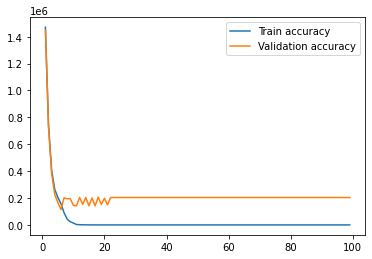

In [34]:
#Plot the graph
plt.figure()
plt.plot(np.arange(1,n_trees),train_accuracy,label='Train accuracy')

plt.plot(np.arange(1,n_trees),val_accuracy,label='Validation accuracy')
plt.legend()

In [35]:
x_train,x_val1,y_train,y_val1=train_test_split(x,y,train_size=0.7,random_state=1)
x_val,x_test,y_val,y_test=train_test_split(x_val1,y_val1,test_size=0.5,random_state=1)

# Define linear regression
model_DR=DecisionTreeRegressor(max_depth=100,criterion='squared_error',splitter='best',ccp_alpha=0,random_state=1)
model_DR.fit(x_train,y_train)

pred_train=model_DR.predict(x_train)
pred_val=model_DR.predict(x_val)
rmse_train=mean_squared_error(y_train,pred_train,squared=False)
rmse_val=mean_squared_error(y_val,pred_val,squared=False)
print(rmse_train,rmse_val)

0.0009476693613027375 203818.44203517927


In [38]:
#select features data
X_test=test.loc[:,'squareMeters':'hasGuestRoom']
X_test=X_test.drop('cityCode',axis=1)
# select_normalized features
# X_test=X_test[reg_features]

#normalize
X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())

# Predict
Y_predict=model_DR.predict(X_test)
# Create submission dataframe
submission=pd.DataFrame({'id':test['id'],'price':Y_predict})
submission.to_csv('submission.csv',index=False)

# Random Forest Regressor

In [39]:
# Train the model using the training set
train_x,val_x,train_y,val_y=train_test_split(x,y,train_size=0.75,random_state=1)


#model=GradientBoostingClassifier(learning_rate=0.01, n_estimators=i)
n_trees = [2,5,10,20,25,50,100,200]
#best_accuracy=0
train_accuracy=[]
val_accuracy=[]
for i in n_trees:
    model=RandomForestRegressor(criterion='squared_error',
                             n_estimators=i,
                            # max_depth=2,
                             max_features=None,
                             bootstrap=True,
                             #min_samples_leaf= 2,
                             random_state=1,
                             ccp_alpha=0.01,
                             
                             ) 
    model.fit(train_x,train_y)
    train_pred=model.predict(train_x)
    y_pred = model.predict(val_x)
    train_accuracy.append(mean_squared_error(train_y,train_pred,squared=False))
    val_accuracy.append(mean_squared_error(val_y,y_pred, squared=False))

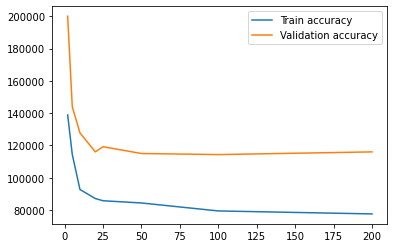

In [40]:
#Plot the graph
plt.figure()
plt.plot(n_trees,train_accuracy,label='Train accuracy')

plt.plot(n_trees,val_accuracy,label='Validation accuracy')
plt.legend()

In [41]:
x_train,x_val,y_train,y_val=train_test_split(x,y,train_size=0.75,random_state=1)


# Define linear regression
model_RF=RandomForestRegressor(n_estimators=25,criterion='squared_error',ccp_alpha=0.01,bootstrap=True,random_state=1)
model_RF.fit(x_train,y_train)

pred_train=model_RF.predict(x_train)
pred_val=model_RF.predict(x_val)
rmse_train=mean_squared_error(y_train,pred_train,squared=False)
rmse_val=mean_squared_error(y_val,pred_val,squared=False)
print(rmse_train,rmse_val)

85789.94867600527 119224.10944757568


In [43]:
#select features data
X_test=test.loc[:,'squareMeters':'hasGuestRoom']
X_test=X_test.drop('cityCode',axis=1)
# select_normalized features

# # normalize
X_test=(X_test-X_test.min())/(X_test.max()-X_test.min())

# Predict
Y_predict=model_RF.predict(X_test)
# Create submission dataframe
submission=pd.DataFrame({'id':test['id'],'price':Y_predict})
submission.to_csv('submission.csv',index=False)